In [1]:
# pip3 install geopandas shapely descartes

In [2]:
import pandas as pd
import geopandas
import os

In [3]:
os.listdir("/home/trh/.local/lib/python3.6/site-packages/geopandas/datasets")

['__init__.py',
 '__pycache__',
 'naturalearth_lowres',
 'naturalearth_creation.py',
 'nybb_16a.zip',
 'naturalearth_cities']

In [4]:
world_path = geopandas.datasets.get_path("naturalearth_lowres")
cities_path = geopandas.datasets.get_path("naturalearth_cities")
cities_path

'/home/trh/.local/lib/python3.6/site-packages/geopandas/datasets/naturalearth_cities/naturalearth_cities.shp'

In [5]:
cities_df = geopandas.read_file(cities_path)
cities_df.head(3)

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)


In [6]:
world_df = geopandas.read_file(world_path)
world_df.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [7]:
type(world_df).__mro__ # method resolution order

(geopandas.geodataframe.GeoDataFrame,
 geopandas.base.GeoPandasBase,
 pandas.core.frame.DataFrame,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.base.SelectionMixin,
 pandas.core.indexing.IndexingMixin,
 object)

In [8]:
type(world_df["geometry"]).__mro__

(geopandas.geoseries.GeoSeries,
 geopandas.base.GeoPandasBase,
 pandas.core.series.Series,
 pandas.core.base.IndexOpsMixin,
 pandas.core.generic.NDFrame,
 pandas.core.base.PandasObject,
 pandas.core.accessor.DirNamesMixin,
 pandas.core.base.SelectionMixin,
 pandas.core.indexing.IndexingMixin,
 object)

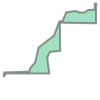

In [9]:
world_df["geometry"].iloc[2]

In [10]:
type(world_df["geometry"].iloc[2])

shapely.geometry.polygon.Polygon

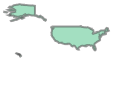

In [11]:
world_df["geometry"].iloc[4]

In [12]:
from shapely.geometry import Polygon

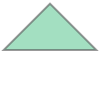

In [13]:
# Line2D((x1, x2, x3), (y1, y2, y3)) # matplotlib
Polygon([(0,0), (1,1), (2,0)]) # shapely

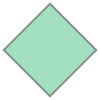

In [14]:
Polygon([(0,0), (1,1), (2,0), (1,-1)]) # shapely

In [15]:
world_df["geometry"].centroid # an attribute, not a method!

0      POINT (163.85316 -17.31631)
1        POINT (34.75299 -6.25773)
2       POINT (-12.13783 24.29117)
3       POINT (-98.14238 61.46908)
4      POINT (-112.59944 45.70563)
                  ...             
172      POINT (20.81965 44.23304)
173      POINT (19.28618 42.78904)
174      POINT (20.89536 42.57937)
175     POINT (-61.33037 10.42824)
176       POINT (30.19862 7.29289)
Length: 177, dtype: geometry

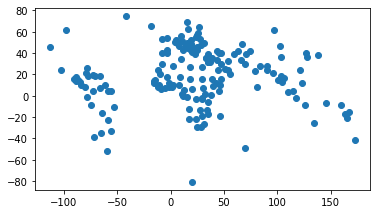

In [16]:
world_df["geometry"].centroid.plot()

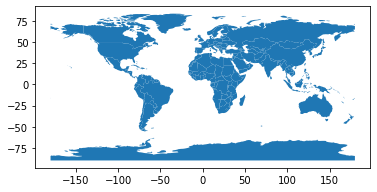

In [17]:
world_df["geometry"].plot()

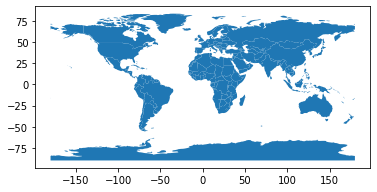

In [18]:
world_df["geometry2"] = world_df["geometry"].centroid
world_df.plot() # calling plot on the current geometry geoseries

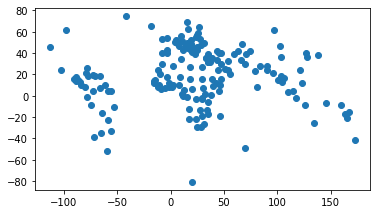

In [19]:
world_df.set_geometry("geometry2").plot()

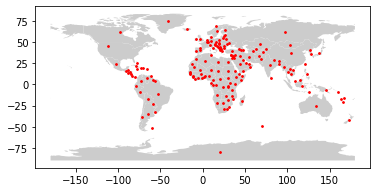

In [20]:
ax = world_df.plot(color="0.8")
world_df["geometry"].centroid.plot(ax=ax, color="r", markersize=3)

# South America with Capitols

In [21]:
sa = world_df[world_df["continent"] == "South America"]
sa.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,geometry2
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",POINT (-65.17536 -35.44682)
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",POINT (-71.52064 -39.04701)
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",POINT (-59.42097 -51.71322)
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",POINT (-56.00328 -32.78090)
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",POINT (-53.05434 -10.80677)


In [22]:
# spatial join
# sudo apt install python3-rtree # don't use pip for this!!!
sa_cities = geopandas.sjoin(cities_df, sa)

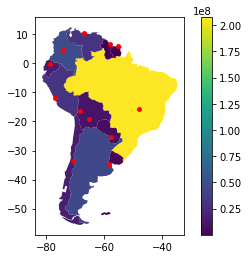

In [23]:
ax = sa.plot(column="pop_est", legend=True)
sa_cities.plot(ax=ax, color="red", markersize=15)